# Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\price\OneDrive\Desktop\Algerian_forest_fires_dataset_UPDATE.csv",header =1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [11]:
### drop index 123 as it contains index names
df.drop([123],inplace = True,axis =0)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [13]:
df.reset_index(inplace = True,drop = True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip() ## stripping off columns name
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [17]:
## convert features into integer type
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] =df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: int32(6), object(8)
memory usage: 21.0+ KB


In [19]:
## converting 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' into float type
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC',
                                                                          'ISI', 'BUI', 'FWI']].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [21]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [22]:
df.loc[:122,"Region"]=0 ## Bejaia Region
df.loc[122:,"Region"]=1 ## Sidi-Bel Abbes Region

In [23]:
df.Region.value_counts()

0.0    122
1.0    121
Name: Region, dtype: int64

In [24]:
## Encoding classes feature
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [26]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

#### The data is cleaned and so we can do some EDA  

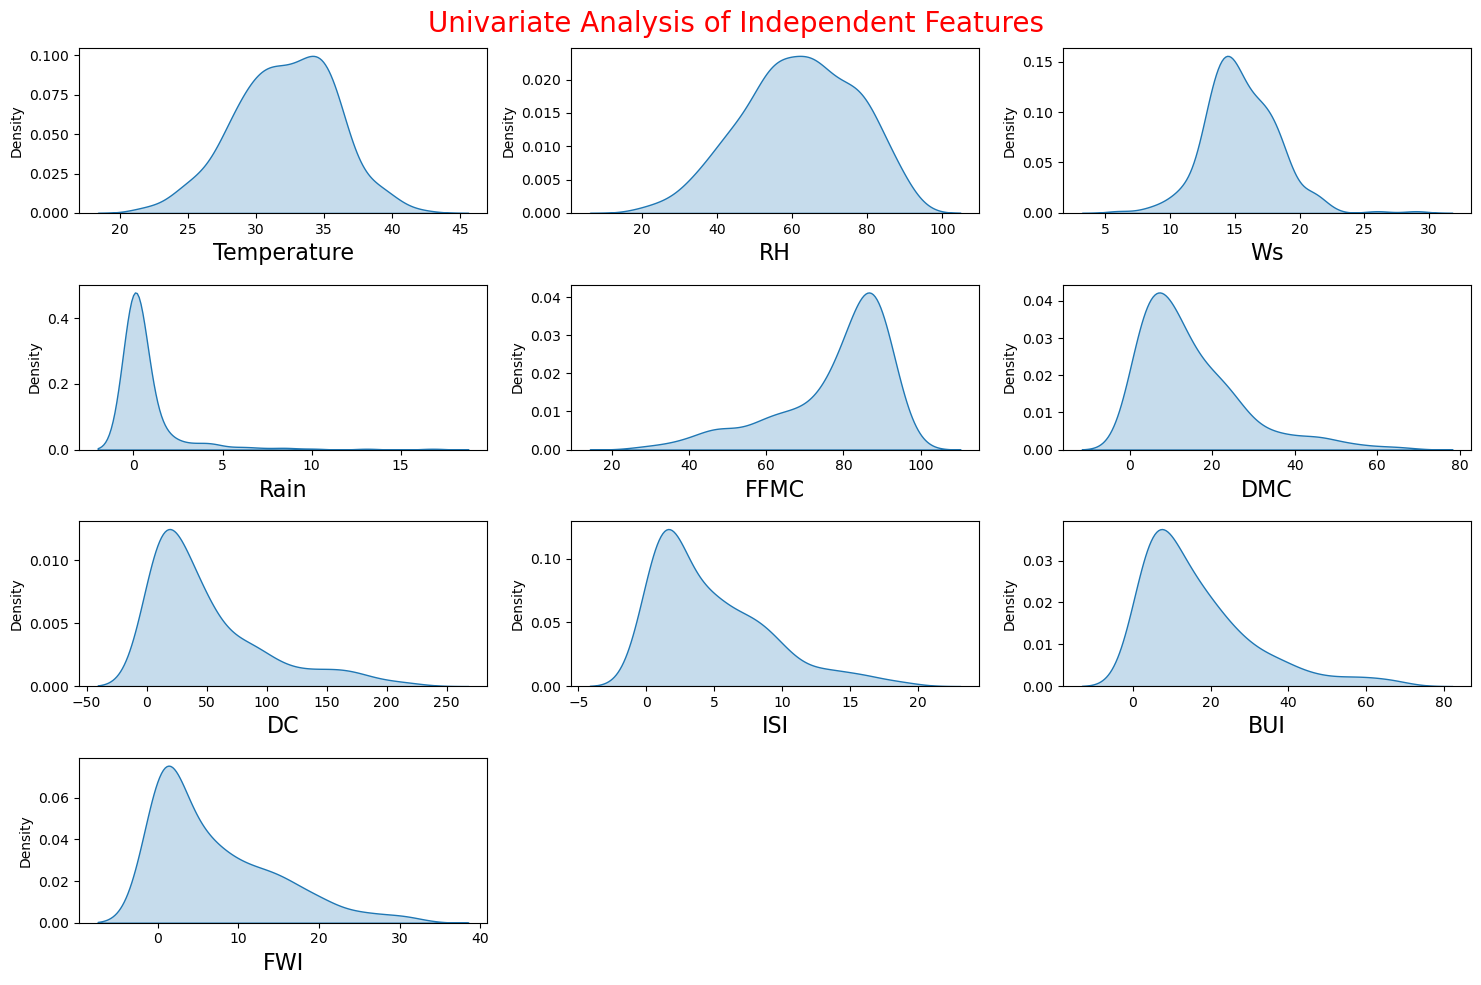

In [27]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Independent Features",fontweight =1.2,fontsize=20,color="red")
for i , col in enumerate(df.columns[3:-2]):
    fig = plt.subplot(4,3,i+1)
    sns.kdeplot(df[col],fill = True ,palette="blues")
    plt.xlabel(col,fontsize=16)
    plt.tight_layout()

In [28]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

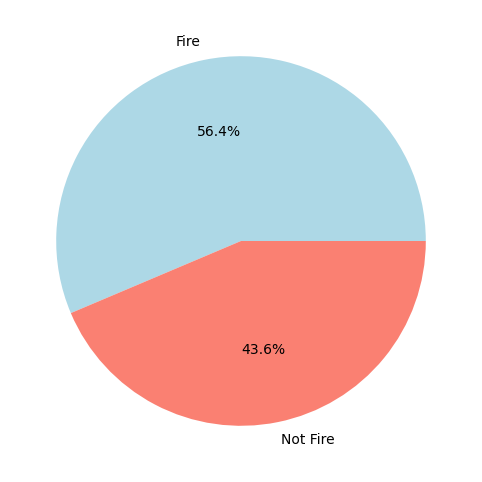

In [29]:
plt.figure(figsize=(12,6))
labels=["Fire","Not Fire"]
plt.pie(df["Classes"].value_counts(),autopct='%1.1f%%',colors = ["lightblue","salmon"],
        labels=labels,wedgeprops = {'linewidth': 10});

In [30]:
df.year.value_counts()

2012    243
Name: year, dtype: int64

<Axes: xlabel='FWI', ylabel='DMC'>

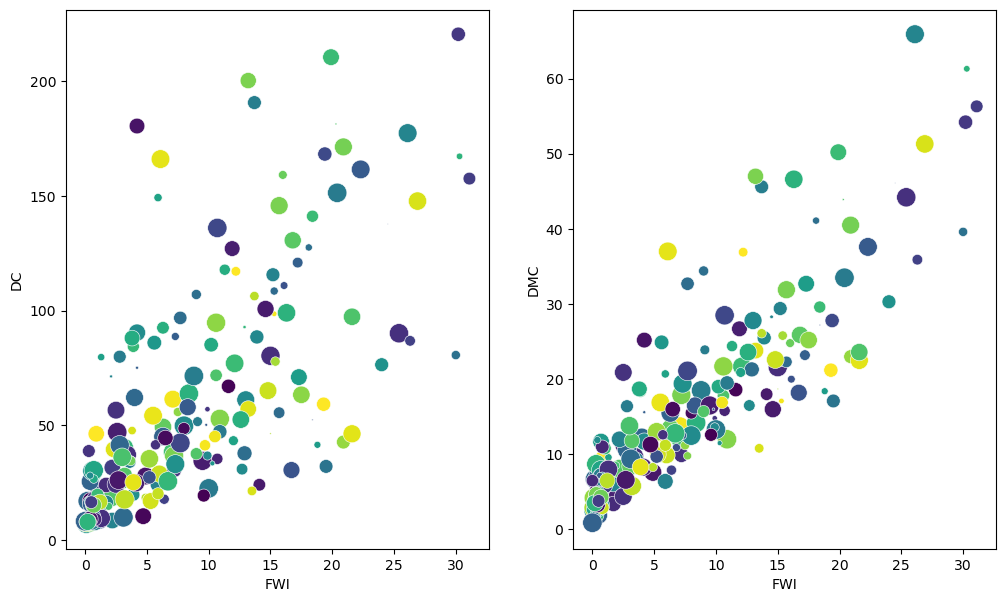

In [31]:
s = 200* np.random.rand(df.shape[0])
c = np.random.rand(df.shape[0])
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(y=df["DC"],x= df["FWI"],s=s,c=c,ax=ax1)
sns.scatterplot(y=df["DMC"],x= df["FWI"],s=s,c=c,ax=ax2)

# Findings 

There is a strong positive correlation between DC ,DMC and FWI, meaning that higher DC and DMC values are associated with higher FWI values and vice versa. This indicates that the moisture content of the deep organic layers affects the fire intensity or energy output also loosely compacted organic layers of moderate depth on the forest floor affects the fire intensity.

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


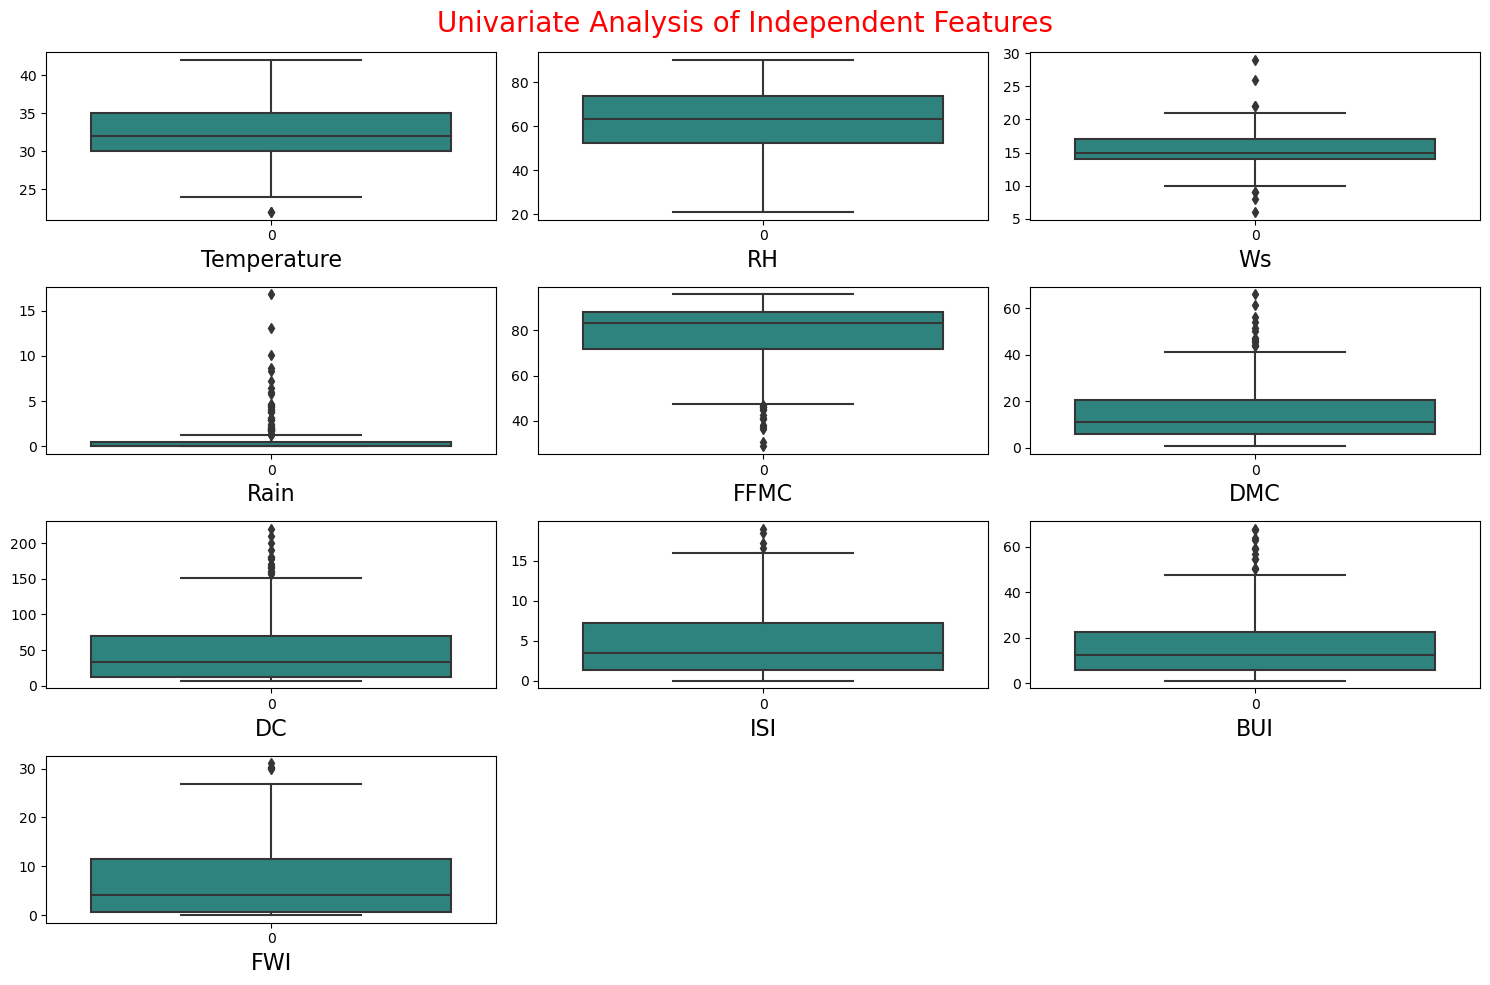

In [33]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Independent Features",fontweight =1.2,fontsize=20,color="red")
for i , col in enumerate(df.columns[3:-2]):
    fig = plt.subplot(4,3,i+1)
    sns.boxplot(df[col],palette="viridis")
    plt.xlabel(col,fontsize=16)
    plt.tight_layout()


Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

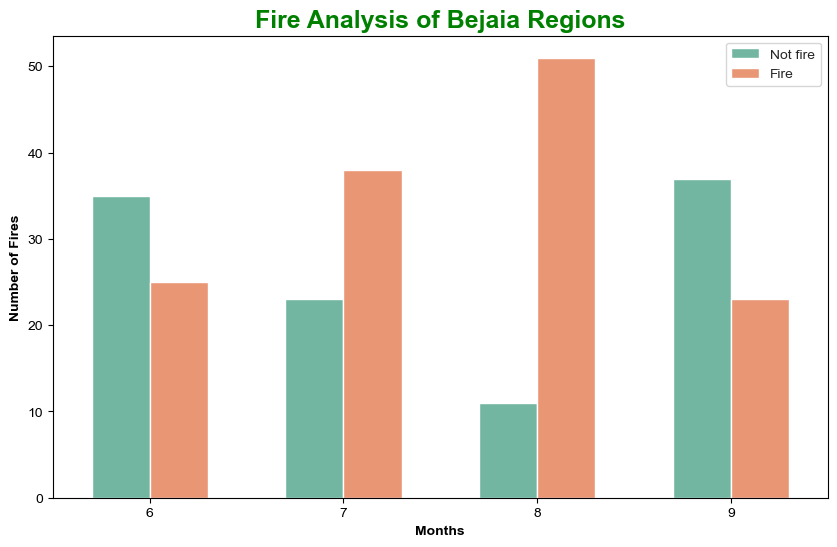

In [34]:
df_temp=df.loc[df['Region']==1]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,palette="Set2",width=0.6)
plt.legend(["Not fire","Fire"])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Regions",weight='bold',fontsize=18,color="green")

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

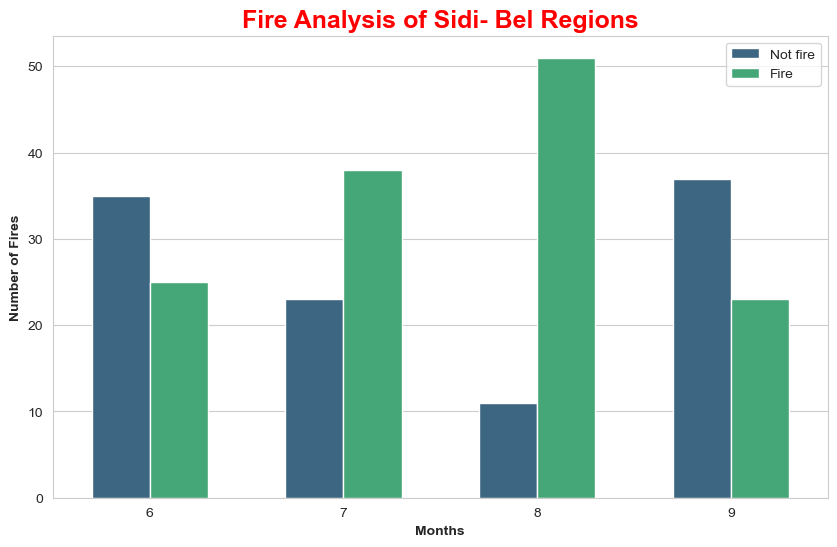

In [35]:
df_temp=df.loc[df['Region']==1]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,palette="viridis",width=0.6)
plt.legend(["Not fire","Fire"])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold',fontsize=18,color="red")

### observations

- Number of fires mostly occur in July and August month in the both region.
- least number of fires occur in september month

# Splitting data into train and test 

In [36]:
X = df.drop(["FWI","year","day"],axis=1)
y = df["FWI"]


<Axes: >

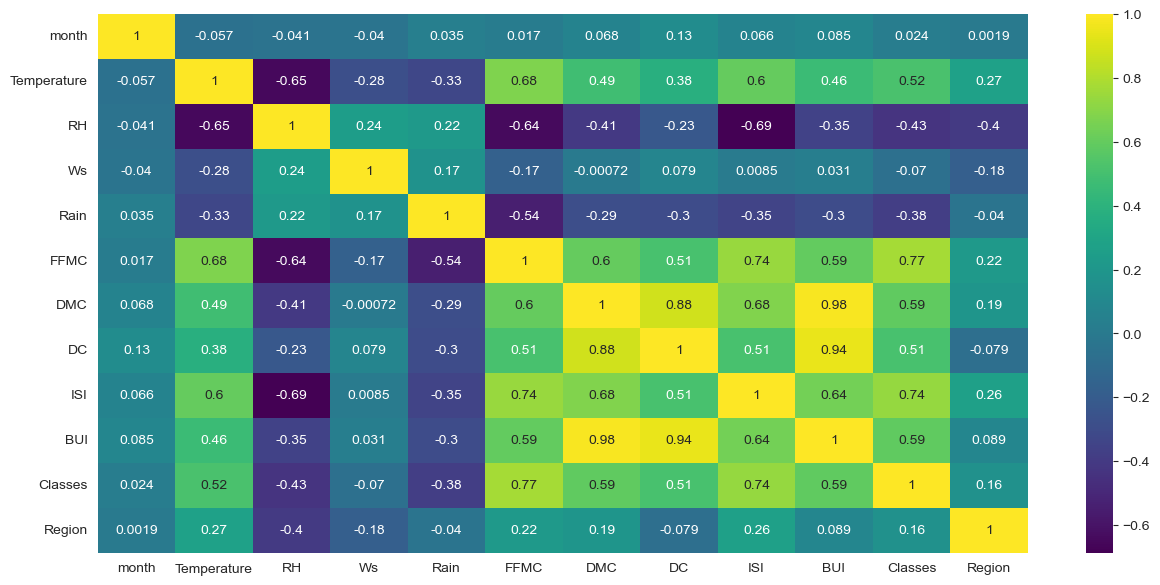

In [37]:
plt.figure(figsize =(15,7))
sns.heatmap(X.corr(),annot = True , cmap= "viridis")

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)

In [40]:
x_train.shape , x_test.shape,y_train.shape , y_test.shape

((182, 12), (61, 12), (182,), (61,))

# Feature Selection

In [41]:
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr   

In [42]:
correlation_feat = correlation(x_train,0.90)
correlation_feat

{'BUI'}

In [43]:
x_train = x_train.drop(correlation_feat,axis=1)
x_test = x_test.drop(correlation_feat,axis=1)

# Scaling the data

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

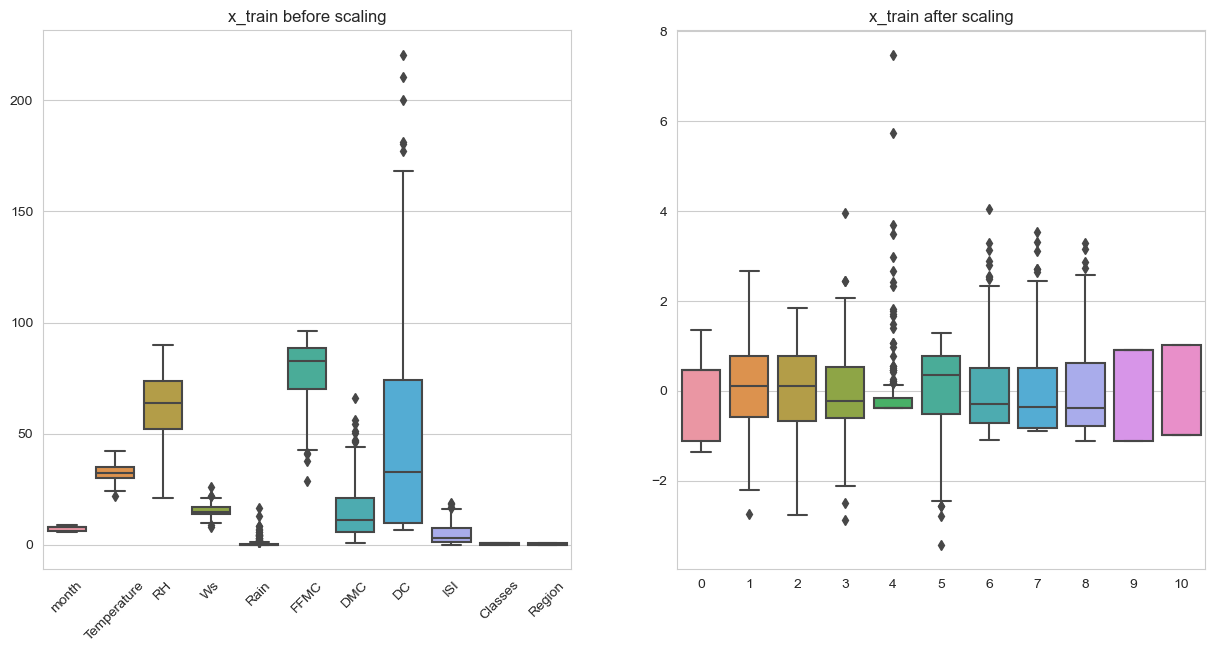

In [46]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("x_train before scaling")
plt.xticks(rotation =45)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title("x_train after scaling")


# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(x_train_scaled,y_train)
y_preds = LR.predict(x_test_scaled)
score = r2_score(y_test,y_preds)
Mae = mae(y_test,y_preds)
print("Score = ",score)
print("MAE = ",Mae)





Score =  0.9829841715684527
MAE =  0.5218798843536679


# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_preds = lasso.predict(x_test_scaled)
score = r2_score(y_test,y_preds)
Mae = mae(y_test,y_preds)
print("Score = ",score)
print("MAE = ",Mae)


Score =  0.9498931628519823
MAE =  1.1257992990774721


# Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_preds = ridge.predict(x_test_scaled)
score = r2_score(y_test,y_preds)
Mae = mae(y_test,y_preds)
print("Score = ",score)
print("MAE = ",Mae)


Score =  0.9822951100071035
MAE =  0.5349635092558278


# Elastic Net Regression

In [50]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(x_train_scaled,y_train)
y_preds = EN.predict(x_test_scaled)
score = r2_score(y_test,y_preds)
Mae = mae(y_test,y_preds)
print("Score = ",score)
print("MAE = ",Mae)


Score =  0.8887825256824249
MAE =  1.7704253019617469


##### Saving the Linear Regression model as a pickle file, since it is the best model.

In [51]:
import pickle 
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(LR,open("linear_regressor.pkl","wb"))

In [52]:
model = pickle.load(open("linear_regressor.pkl","rb"))

In [53]:
y_preds = model.predict(x_test_scaled)
score = r2_score(y_test,y_preds)

In [54]:
score

0.9829841715684527